<a href="https://colab.research.google.com/github/rajeev541/ML_Na-ve_bayes/blob/main/ML18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

implement the Naïve bayes on the iris dataset.

In [1]:
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
from collections import Counter

In [5]:
import math

In [6]:
from scipy.stats import norm

In [7]:
from google .colab import drive

In [8]:
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
iris=pd.read_csv('/content/drive/MyDrive/Document from Rajeev Rawat (1)')

In [10]:
iris = pd.DataFrame(iris)

In [11]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
iris.shape

(150, 6)

In [13]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [14]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [15]:
df = iris

In [16]:
target_category =iris['Species'].unique()

In [17]:
target_category=list(map(str,target_category))

In [18]:
print(target_category)

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


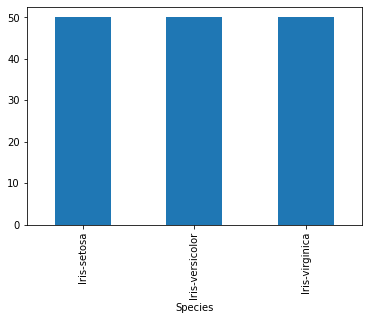

In [19]:
iris.groupby('Species').Species.count().plot.bar(ylim=0)

In [20]:
data = iris

In [21]:
iris['Category'] = iris['Species'].factorize()[0]

In [22]:
category = iris['Category']

In [23]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Category
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [24]:
data_train,data_test,species_train,species_test = train_test_split(data,category, test_size = 0.2, stratify = category,random_state=1)

In [25]:
print(np.bincount(species_train))

[40 40 40]


In [26]:
newIris = pd.DataFrame(np.column_stack([data_train,species_train]))

In [27]:
setosa = newIris[newIris[4] == 0]

In [28]:
versicolor = newIris[newIris[4]==1]

In [29]:
newIris = pd.concat([setosa,versicolor])

In [30]:
setosa_data=newIris[0:40]

In [31]:
versicolor_data=newIris[40:80]

In [32]:
setosa_mean = setosa_data.mean()

<ipython-input-32-3fa89beb0ed2>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  setosa_mean = setosa_data.mean()


In [33]:
versicolor_mean = versicolor_data.mean()

In [34]:
setosa_std = setosa_data.std()

<ipython-input-34-1468226dbb1e>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  setosa_std = setosa_data.std()


In [35]:
versicolor_std = versicolor_data.std()

In [36]:
X = []

In [37]:
likelihood = []